# IMPORT LIBRARIES NEEDED

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import itertools
import seaborn as sns

# IMPORT THE DATASET

In [4]:
df = pd.read_excel("E:\internship\Dataset\superstoresales.xls")

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# CLEANING THE DATASET

In [6]:
#Check for missing values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#Check the different types of product categories included
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
#Now we create a dataframe which includes only data related to furniture sales. 
furniture = df.loc[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [9]:
#Know the earliest date recorded
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [11]:
#Know the most recent date recorded
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

# DATA PROCESSING

In [12]:
#Now we can remove unnecessary columns from the furniture dataframe
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [13]:
#Now let's sort furniture datframe according to order date
furniture = furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [14]:
#Now let's find how much total furniture sales occurred on each date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [15]:
#Now let's set the Order date column as the index column
furniture = furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [16]:
#Now let's see whether there is any frequency in the dataframe
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [17]:
#Now let's resample the data into means of monthly sales of furniture and save this into a new variable called Order date
y_furniture = furniture['Sales'].resample('MS').mean()
y_furniture

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [18]:
#Now let's check the monthly sales value happened in year 2017
print(y_furniture['2017':])

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


In [19]:
office= df.loc[df['Category'] == 'Office Supplies']
office

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [20]:
office['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [21]:
office['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [22]:
office.drop(cols,axis=1,inplace=True)
office

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900
...,...,...
9982,2016-09-22,35.560
9984,2015-05-17,31.500
9985,2015-05-17,55.600
9992,2017-02-26,29.600


In [23]:
office= office.sort_values('Order Date')
office

,Order Date,Sales
7980,2014-01-03,16.448
740,2014-01-04,272.736
739,2014-01-04,11.784
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
1297,2017-12-30,20.720
908,2017-12-30,52.776
1296,2017-12-30,13.904


In [24]:
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


In [25]:
office = office.set_index('Order Date')
office

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430
...,...
2017-12-26,814.594
2017-12-27,13.248
2017-12-28,1091.244


In [26]:
office.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [27]:
y_office = office['Sales'].resample('MS').mean()
y_office

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

In [28]:
print(y_office['2017':])

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64


In [29]:
technology = df.loc[df['Category'] == 'Technology']
technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [30]:
technology['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [31]:
technology['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [32]:
technology.drop(cols,axis=1,inplace=True)
technology

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-12-08,1097.544
...,...,...
9983,2016-09-22,97.980
9986,2016-09-29,36.240
9987,2017-11-17,79.990
9988,2017-11-17,206.100


In [33]:
technology = technology.sort_values('Order Date')
technology

,Order Date,Sales
7478,2014-01-06,755.960
7477,2014-01-06,391.980
593,2014-01-09,31.200
765,2014-01-13,646.740
1913,2014-01-15,149.950
...,...,...
4924,2017-12-25,90.480
2569,2017-12-27,164.388
573,2017-12-28,14.850
1878,2017-12-29,302.376


In [34]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-09,31.200
2,2014-01-13,646.740
3,2014-01-15,149.950
4,2014-01-16,124.200
...,...,...
819,2017-12-25,401.208
820,2017-12-27,164.388
821,2017-12-28,14.850
822,2017-12-29,302.376


In [35]:
technology = technology.set_index('Order Date')
technology

,Sales
Order Date,
2014-01-06,1147.940
2014-01-09,31.200
2014-01-13,646.740
2014-01-15,149.950
2014-01-16,124.200
...,...
2017-12-25,401.208
2017-12-27,164.388
2017-12-28,14.850


In [36]:
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [37]:
y_technology = technology['Sales'].resample('MS').mean()
y_technology

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
2014-06-01     766.905909
2014-07-01     533.608933
2014-08-01     708.435385
2014-09-01    2035.838133
2014-10-01     596.900900
2014-11-01    1208.056320
2014-12-01    1160.732889
2015-01-01     925.070800
2015-02-01     431.121250
2015-03-01     574.662333
2015-04-01     697.559500
2015-05-01     831.642857
2015-06-01     429.024400
2015-07-01     691.397733
2015-08-01    1108.902286
2015-09-01     950.856400
2015-10-01     594.716111
2015-11-01    1037.982652
2015-12-01    1619.637636
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
2017-01-01    1195.218071
2017-02-01     430.501714
2

# Plotting the sales data for each categories

<AxesSubplot:xlabel='Order Date'>

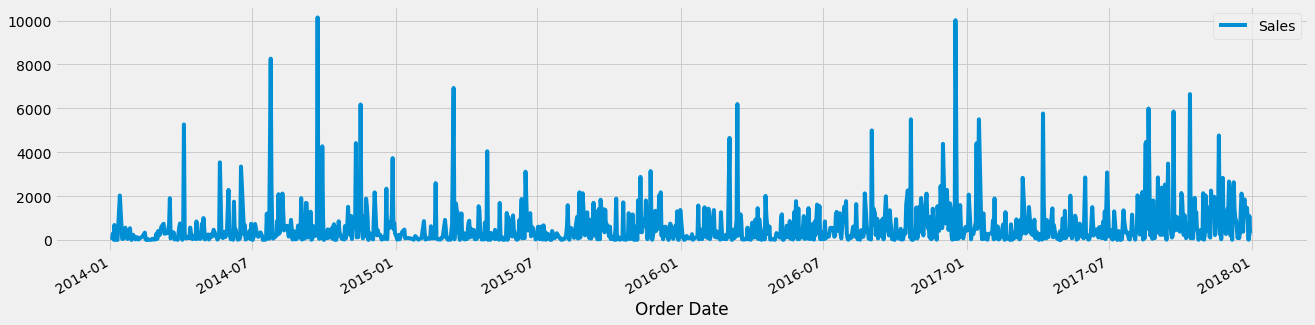

In [38]:
office.plot(figsize=(20,5))

<AxesSubplot:xlabel='Order Date'>

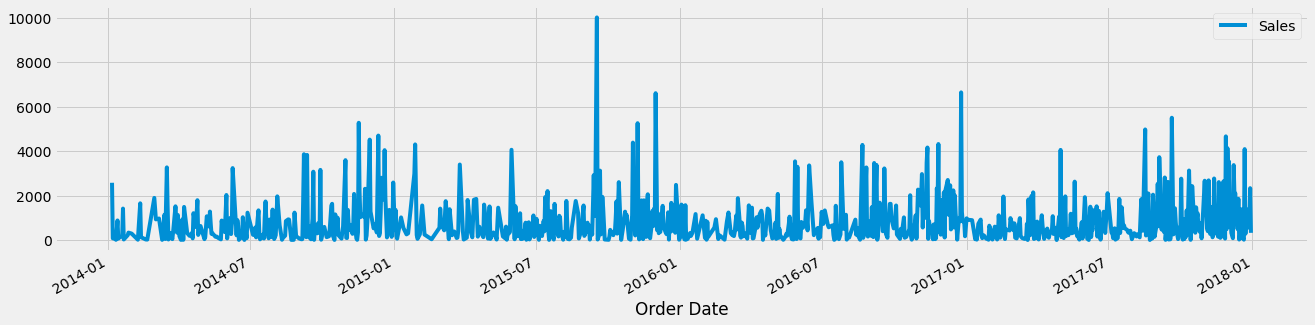

In [39]:
furniture.plot(figsize=(20,5))

<AxesSubplot:xlabel='Order Date'>

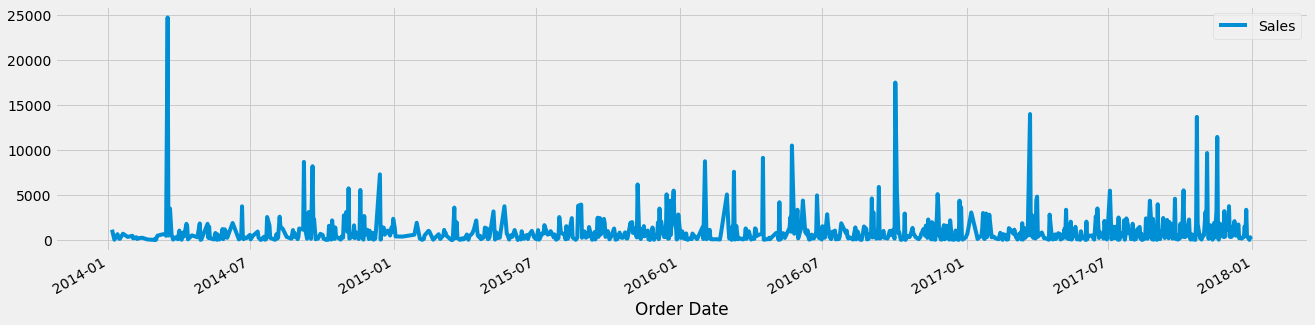

In [40]:
technology.plot(figsize=(20,5))

# Plotting the mean sales data for each categories

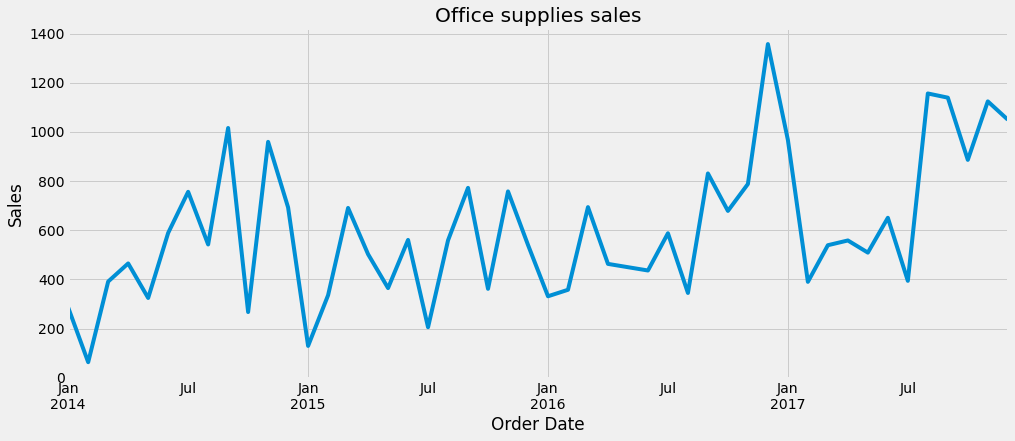

In [41]:
y_office.plot(figsize=(15,6))
plt.title("Office supplies sales")
plt.ylabel("Sales")
plt.show()

Text(0, 0.5, 'Sales')

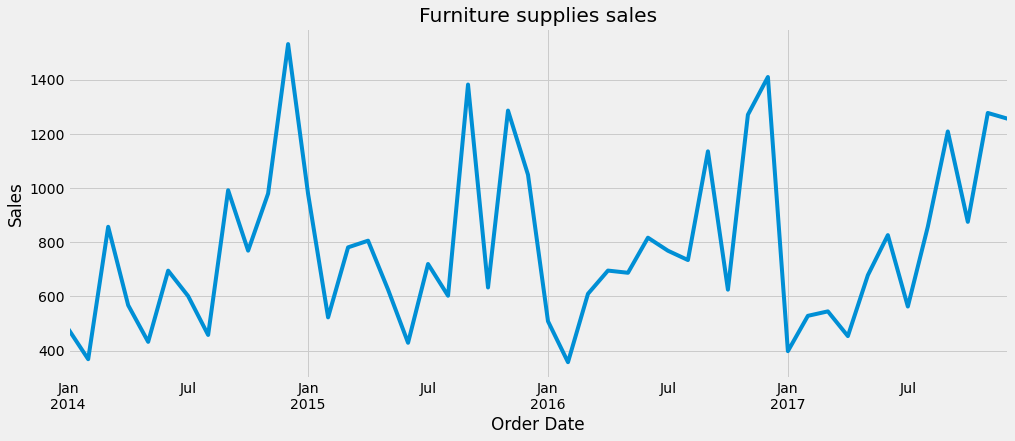

In [42]:
y_furniture.plot(figsize=(15,6))
plt.title("Furniture supplies sales")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

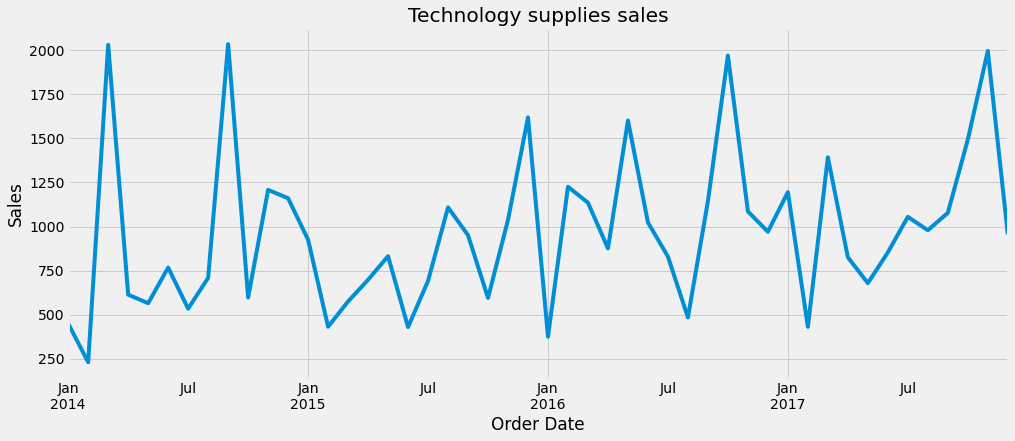

In [43]:
y_technology.plot(figsize=(15,6))
plt.title("Technology supplies sales")
plt.ylabel("Sales")

Boxplots on sales of each product categories

Text(0.5, 1.0, 'Box Plot on furniture sales')

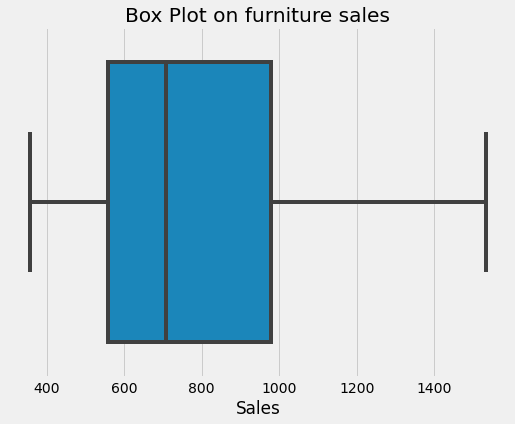

In [44]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(y_furniture).set_title('Box Plot on furniture sales')

Text(0.5, 1.0, 'Box Plot office supply sales')

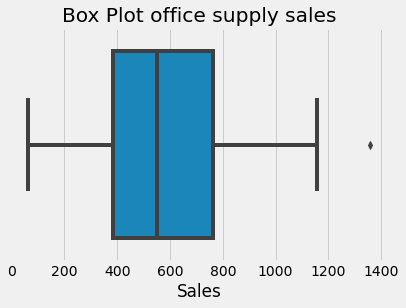

In [45]:
sns.boxplot(y_office).set_title('Box Plot office supply sales')

Text(0.5, 1.0, 'Box Plot Technology sales')

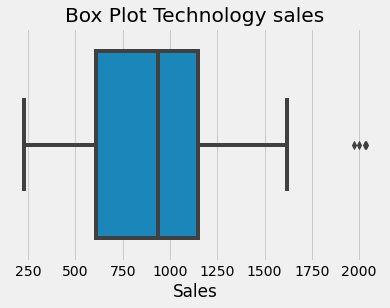

In [46]:
sns.boxplot(y_technology).set_title('Box Plot Technology sales')

# Perform ets decomposition

ETS decomposition of office

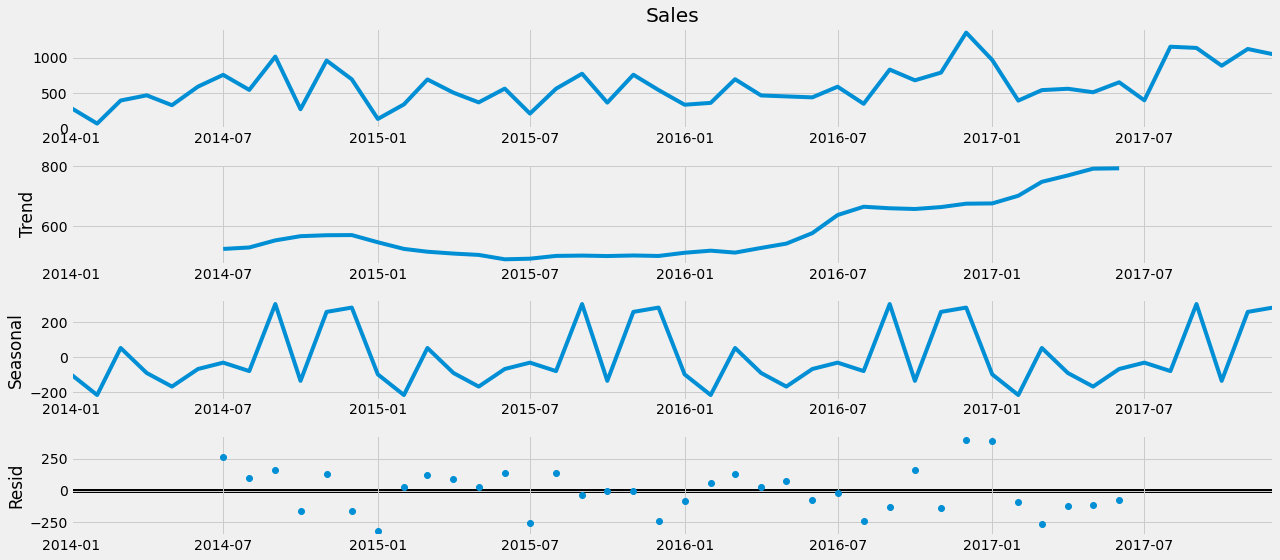

In [47]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition_office = sm.tsa.seasonal_decompose(y_office,model='additive')
fig = decomposition_office.plot()
plt.show()

<AxesSubplot:xlabel='Order Date'>

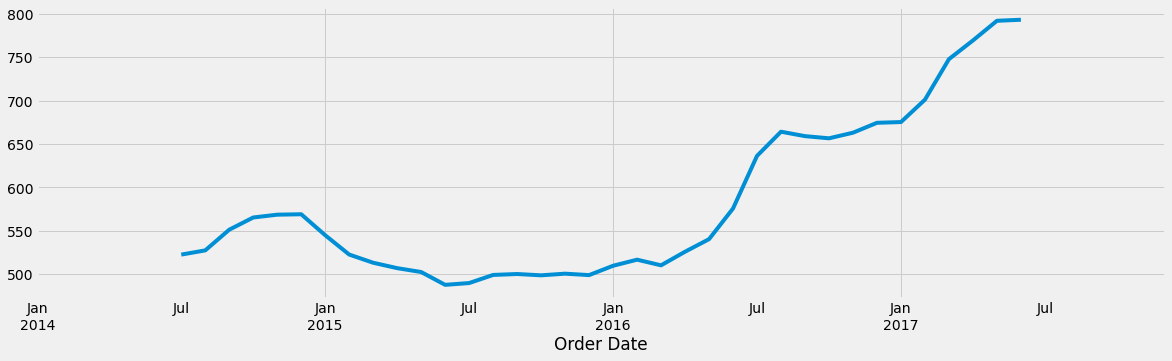

In [48]:
decomposition_office.trend.plot(figsize=(18,5))

<AxesSubplot:xlabel='Order Date'>

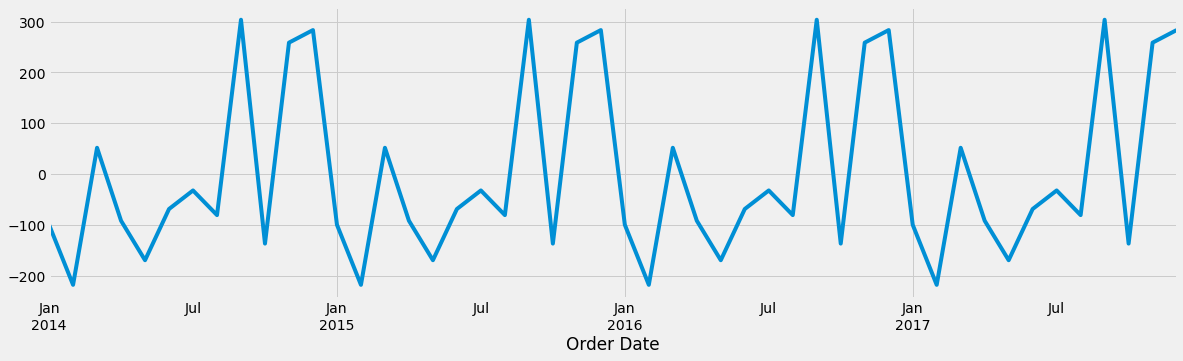

In [49]:
decomposition_office.seasonal.plot(figsize=(18,5))

ETS decomposition of furniture

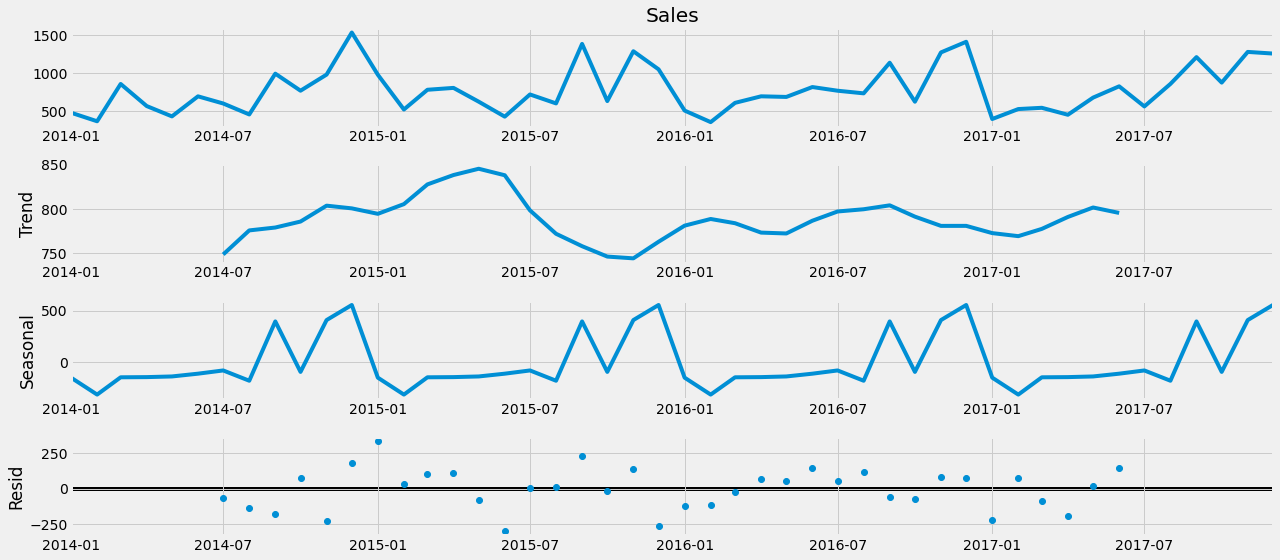

In [50]:
rcParams['figure.figsize']=18,8
decomposition_furniture = sm.tsa.seasonal_decompose(y_furniture,model='additive')
fig = decomposition_furniture.plot()
plt.show()

<AxesSubplot:xlabel='Order Date'>

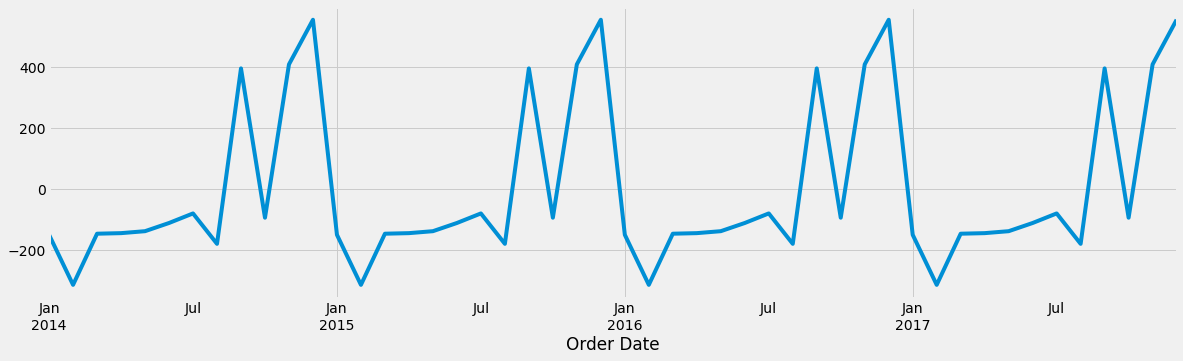

In [51]:
decomposition_furniture.seasonal.plot(figsize=(18,5))

<AxesSubplot:xlabel='Order Date'>

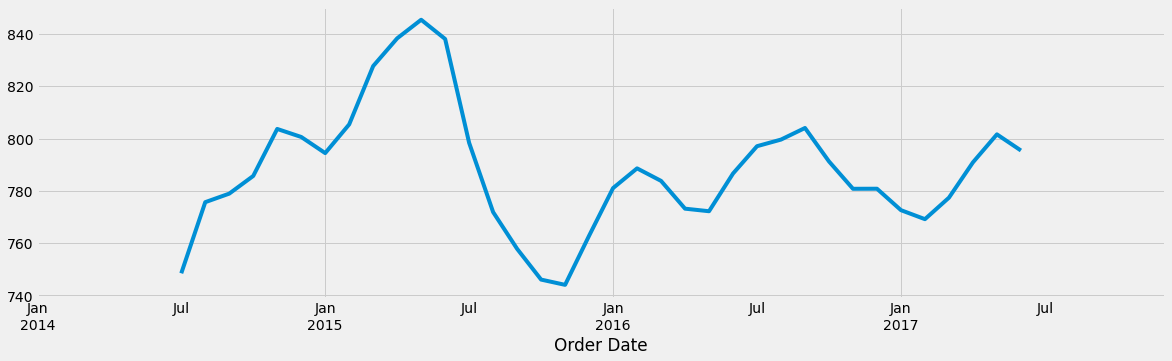

In [52]:
decomposition_furniture.trend.plot(figsize=(18,5))

ETS decomposition of technology

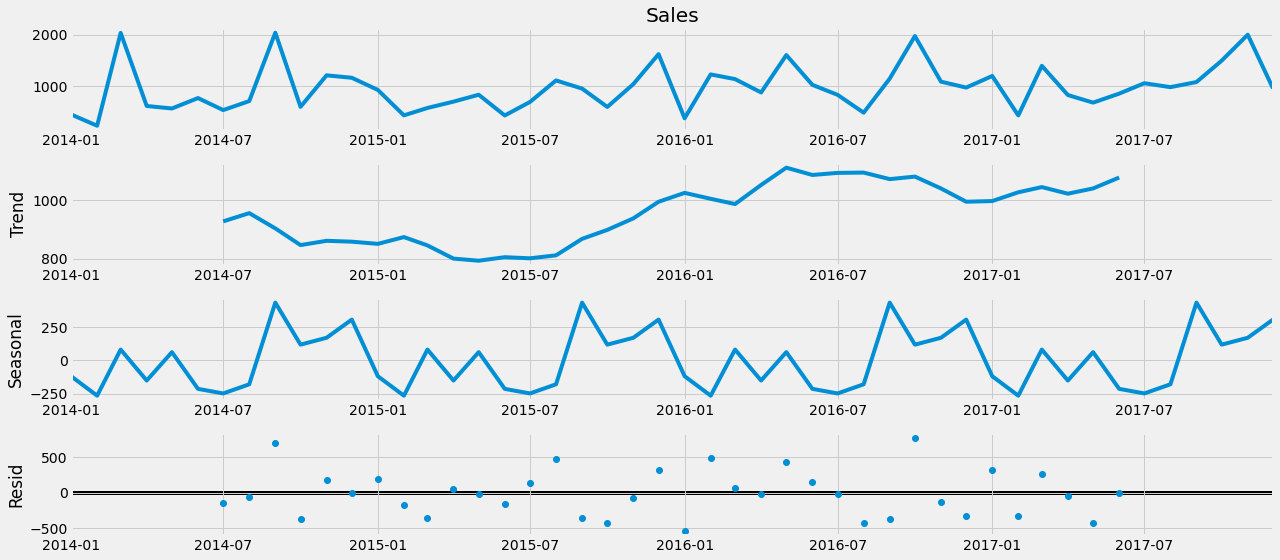

In [53]:
rcParams['figure.figsize']=18,8
decomposition_technology = sm.tsa.seasonal_decompose(y_technology,model='additive')
fig = decomposition_technology.plot()
plt.show()

<AxesSubplot:xlabel='Order Date'>

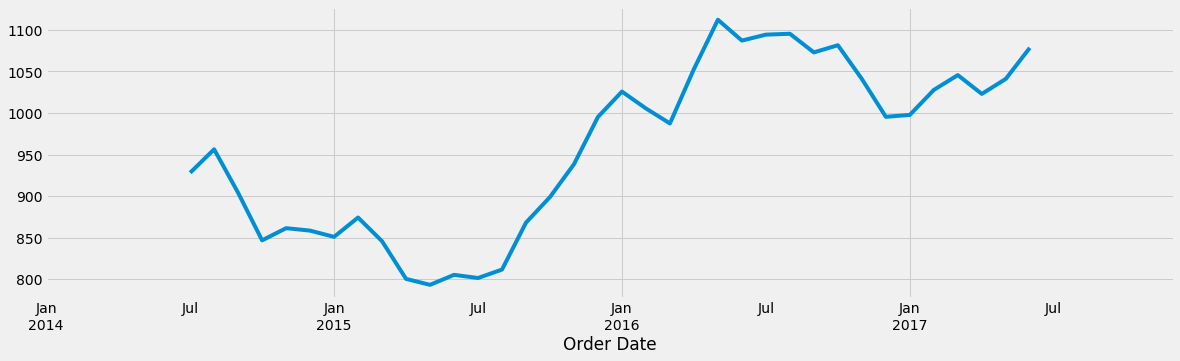

In [54]:
decomposition_technology.trend.plot(figsize=(18,5))

<AxesSubplot:xlabel='Order Date'>

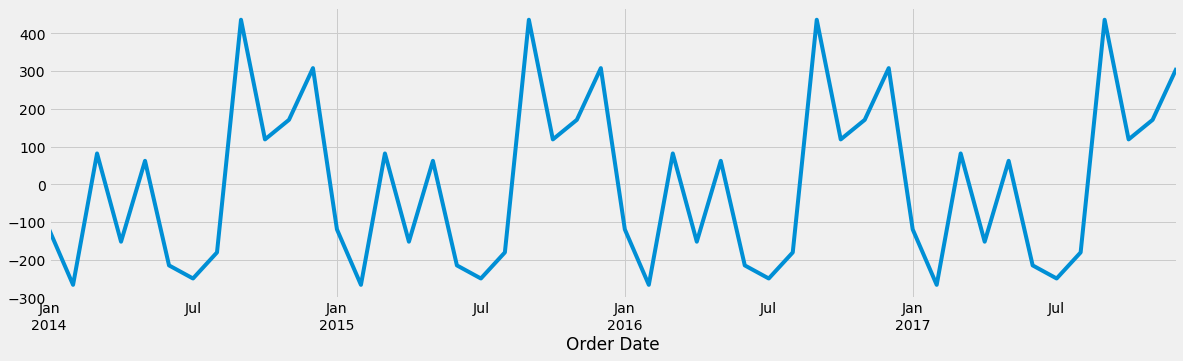

In [55]:
decomposition_technology.seasonal.plot(figsize=(18,5))

# Test for stationarity

In [56]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

Furniure

In [57]:
adf_test(y_furniture)

Augmented Dickey-Fuller Test: 
ADF test statistic      -5.191070
p-value                  0.000009
# lags used             10.000000
# observations          37.000000
critical value (1%)     -3.620918
critical value (5%)     -2.943539
critical value (10%)    -2.610400
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Office 

In [58]:
adf_test(y_office)

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.664633
p-value                  0.000098
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Technology

In [59]:
adf_test(y_technology)

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.187969e+00
p-value                 2.547334e-10
# lags used             0.000000e+00
# observations          4.700000e+01
critical value (1%)    -3.577848e+00
critical value (5%)    -2.925338e+00
critical value (10%)   -2.600774e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# Time series forecasting with ARIMA

Train test split

Office

In [60]:
len(y_office)

48

In [61]:
48-12

36

In [62]:
train_office = y_office.iloc[:36]
test_office = y_office.iloc[36:]
train_office

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
Freq: MS, Name: Sales, dtype: float64

In [63]:
test_office

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

In [64]:
len(test_office)

12

Find the best Model

In [65]:
import sys
!{sys.executable} -m pip install pmdarima
from pmdarima import auto_arima

In [66]:
model_office = auto_arima(y_office,m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=682.234, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=672.340, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=680.349, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=673.518, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=671.706, Time=0.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=673.093, Time=0.75 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=679.178, Time=0.35 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=667.310, Time=0.56 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=667.427, Time=0.17 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=669.173, Time=0.84 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=669.30

In [67]:
model_office.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                -326.927
Date:                             Tue, 26 Jul 2022   AIC                            661.855
Time:                                     15:40:47   BIC                            669.255
Sample:                                          0   HQIC                           664.639
                                              - 48                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8129      0.083     -9.802      0.000      -0.975      -0.650
ar.S.L12       0.2683      0.235      1.141      0.254      -0.192       0.729
ar.S.L24       0.3047      0.257      1.187      0.235      -0.198       0.808
sigma2      5.755e+04   1.13e+04      5.078      0.000    3.53e+04    7.98e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.66   Prob(JB):                         0.29
Heteroskedasticity (H):               1.57   Skew:                             0.49
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
model_office

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

Train the model

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
model_office = SARIMAX(train_office,order=(0, 1, 1),seasonal_order=(2, 0, 0, 12),enforce_invertibility=False)

In [71]:
result_office = model_office.fit()

In [72]:
result_office.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                -242.536
Date:                             Tue, 26 Jul 2022   AIC                            493.072
Time:                                     15:42:33   BIC                            499.294
Sample:                                 01-01-2014   HQIC                           495.220
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9292      0.151     -6.143      0.000      -1.226      -0.633
ar.S.L12       0.3049      0.315      0.969      0.333      -0.312       0.922
ar.S.L24       0.3410      0.504      0.677      0.499      -0.647       1.329
sigma2      4.942e+04    1.6e+04      3.094      0.002    1.81e+04    8.07e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 7.89
Prob(Q):                              0.68   Prob(JB):                         0.02
Heteroskedasticity (H):               0.98   Skew:                             0.74
Prob(H) (two-sided):                  0.98   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Run model diagnostics to investigate any unusual behaviour

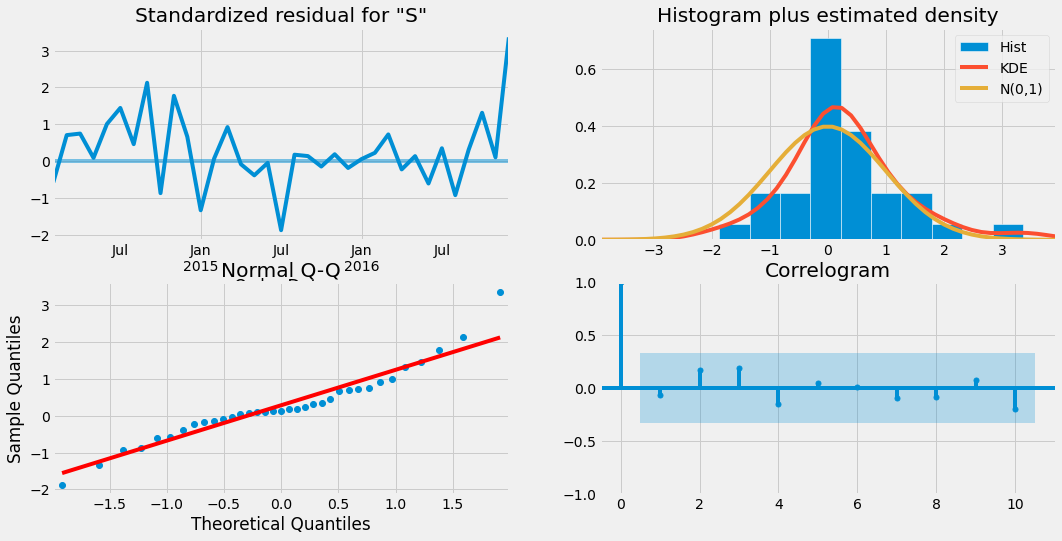

In [73]:
result_office.plot_diagnostics(figsize=(16,8))
plt.show()

Now predict values in the future

In [74]:
start = len(train_office)
end = len(train_office) + len(test_office) - 1

In [75]:
prediction_office = result_office.predict(start,end).rename('SARIMA model predictions')

In [76]:
prediction_office

2017-01-01    408.624468
2017-02-01    487.009611
2017-03-01    710.608486
2017-04-01    576.016140
2017-05-01    524.933122
2017-06-01    587.624887
2017-07-01    512.678149
2017-08-01    559.191605
2017-09-01    780.226162
2017-10-01    593.658229
2017-11-01    762.228763
2017-12-01    861.511275
Freq: MS, Name: SARIMA model predictions, dtype: float64

Text(0.5, 1.0, 'Office supplies sales')

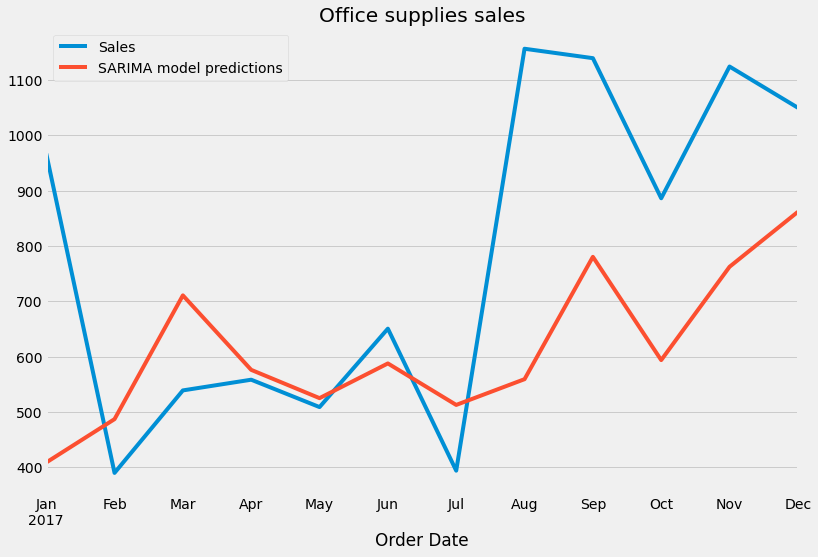

In [77]:
test_office.plot(figsize=(12,8),legend=True)
prediction_office.plot(legend=True)
plt.title("Office supplies sales")

Evaluation of our model

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [79]:
mean_squared_error(test_office,prediction_office)

92188.29926713929

In [80]:
rmse(test_office,prediction_office)

303.6252612467205

In [81]:
test_office.mean()

780.1716465938612

In [82]:
#Comparing the mean value to the root mean square value we can say that the model had predicted in a good way

Now let us forecast into the unknown future

In [83]:
model_office_final = SARIMAX(y_office,order=(0, 1, 1),seasonal_order=(2, 0, 0, 12),enforce_invertibility=False)

In [84]:
result_office_final = model_office_final.fit()

In [85]:
forecast_office = result_office_final.predict(len(y_office),len(y_office)+11,typ='levels').rename('SARIMA forecast')

Text(0.5, 1.0, 'Office supplies sales')

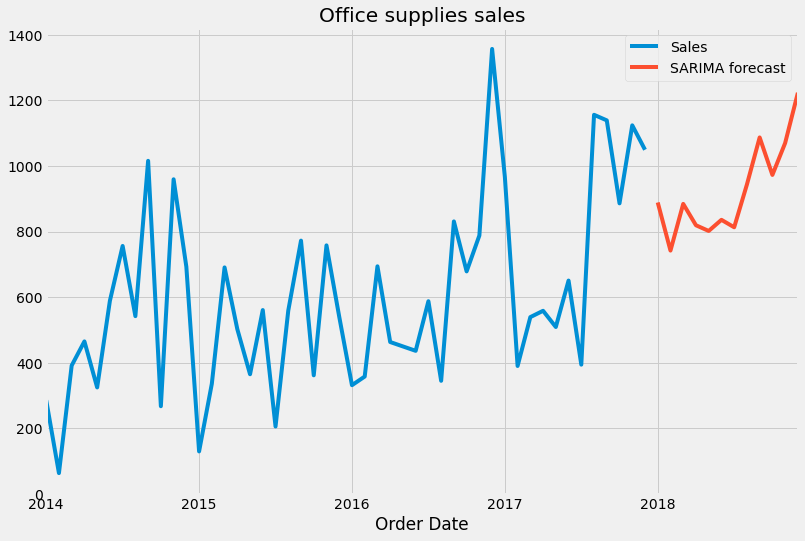

In [86]:
y_office.plot(legend=True,figsize=(12,8))
forecast_office.plot(legend=True)
plt.title("Office supplies sales")

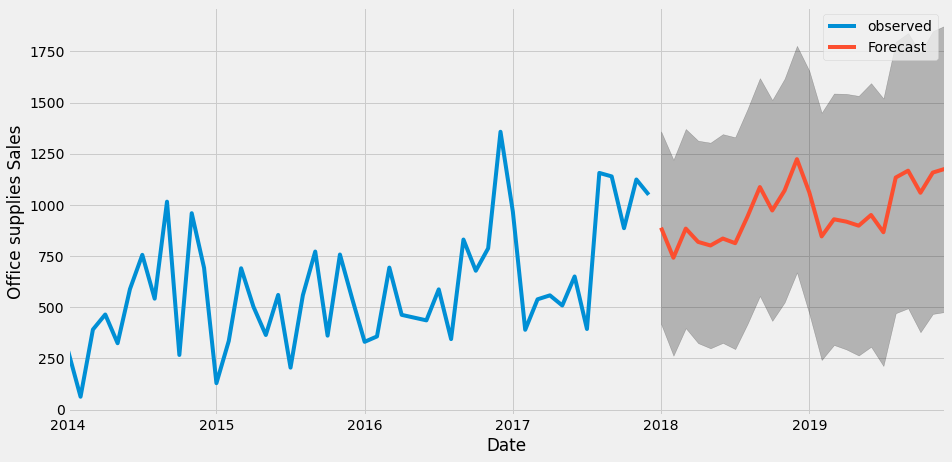

In [87]:
pred_office = result_office_final.get_forecast(steps=24)
pred_ci_office = pred_office.conf_int()
ax = y_office.plot(label='observed',figsize=(14,7))
pred_office.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci_office.index,
               pred_ci_office.iloc[:,0],
               pred_ci_office.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office supplies Sales')
plt.legend()
plt.show()

Furniture

In [88]:
len(y_furniture)

48

In [89]:
train_furniture = y_furniture.iloc[:36]
test_furniture = y_furniture.iloc[36:]

In [90]:
train_furniture

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [91]:
test_furniture

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [92]:
len(test_furniture)

12

Find the best model

In [93]:
model_furniture = auto_arima(y_furniture,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=494.532, Time=0.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=497.083, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=494.685, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=495.371, Time=0.28 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=496.076, Time=0.82 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=501.844, Time=2.69 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=500.255, Time=1.92 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=494.994, Time=1.42 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=503.517, Time=2.04 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=498.528, Time=0.77 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, T

In [94]:
model_furniture.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -239.266
Date:                              Tue, 26 Jul 2022   AIC                            494.532
Time:                                      15:51:03   BIC                            507.201
Sample:                                           0   HQIC                           498.954
                                               - 48                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1942      1.685     -0.115      0.908      -3.496       3.108
ar.L1          1.7063      0.205      8.311      0.000       1.304       2.109
ar.L2         -0.8541      0.180     -4.735      0.000      -1.208      -0.501
ma.L1         -1.9406      2.029     -0.956      0.339      -5.918       2.037
ma.L2          0.9513      1.898      0.501      0.616      -2.768       4.671
ar.S.L12      -0.1233      0.561     -0.220      0.826      -1.223       0.977
ma.S.L12      -0.8583      3.178     -0.270      0.787      -7.086       5.370
sigma2      1.904e+04   7.11e+04      0.268      0.789    -1.2e+05    1.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.33   Prob(JB):                         0.80
Heteroskedasticity (H):               0.45   Skew:                             0.04
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
model_furniture

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True)

Train the model

In [96]:
model_furniture = SARIMAX(train_furniture,order=(2, 0, 2),seasonal_order=(1, 1, 1, 12),enforce_invertibility=False)

In [97]:
result_furniture = model_furniture.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Run model diagnostics to investigate any unusual behaviour

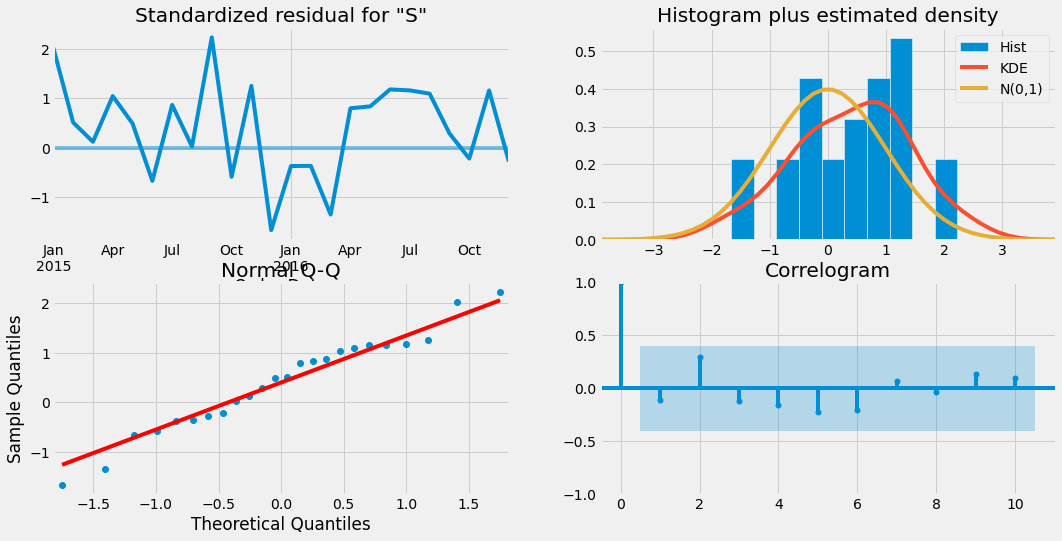

In [98]:
result_furniture.plot_diagnostics(figsize=(16,8))
plt.show()

Now predict the values in the future

In [99]:
start = len(train_furniture)
end = len(train_furniture) + len(test_furniture) - 1

In [100]:
prediction_furniture = result_furniture.predict(start,end).rename('SARIMA model')

In [101]:
prediction_furniture

2017-01-01     720.320888
2017-02-01     502.202141
2017-03-01     850.166541
2017-04-01     641.182676
2017-05-01     567.798468
2017-06-01     546.517871
2017-07-01     601.873397
2017-08-01     554.543186
2017-09-01    1259.474425
2017-10-01     629.592301
2017-11-01    1170.991904
2017-12-01    1256.554132
Freq: MS, Name: SARIMA model, dtype: float64

Text(0.5, 1.0, 'Furniture item sales')

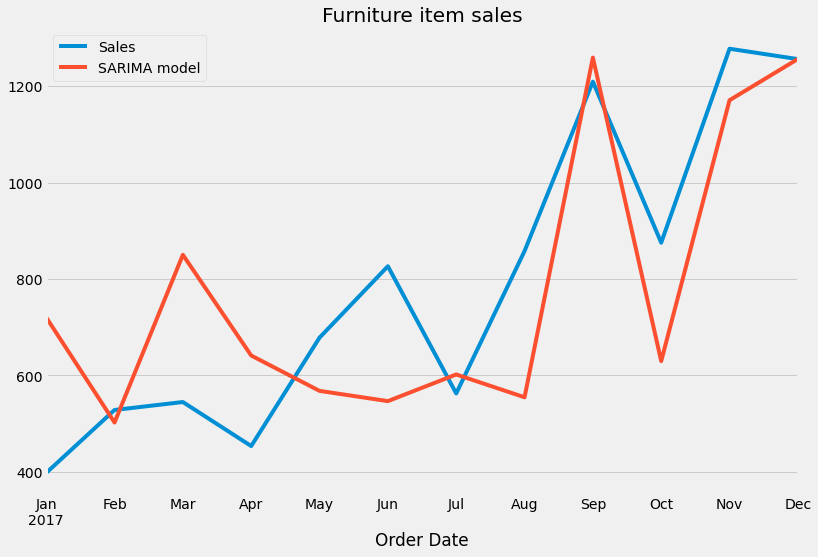

In [102]:
test_furniture.plot(figsize=(12,8),legend=True)
prediction_furniture.plot(legend=True)
plt.title("Furniture item sales")

In [103]:
#Evaluation of our model

In [104]:
mean_squared_error(test_furniture,prediction_furniture)

40991.89524234226

In [105]:
rmse(test_furniture,prediction_furniture)

202.46455305149655

In [106]:
test_furniture.mean()

788.9924321352877

Now let us forecast into the Unknown Future

In [107]:
model_furniture_final = SARIMAX(y_furniture,order=(2, 0, 2),seasonal_order=(1, 1, 1, 12),enforce_invertibility=False)

In [108]:
result_furniture_final = model_furniture_final.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
forecast_furniture = result_furniture_final.predict(len(y_furniture),len(y_furniture)+11,typ='levels').rename('SARIMA forecast')

<AxesSubplot:xlabel='Order Date'>

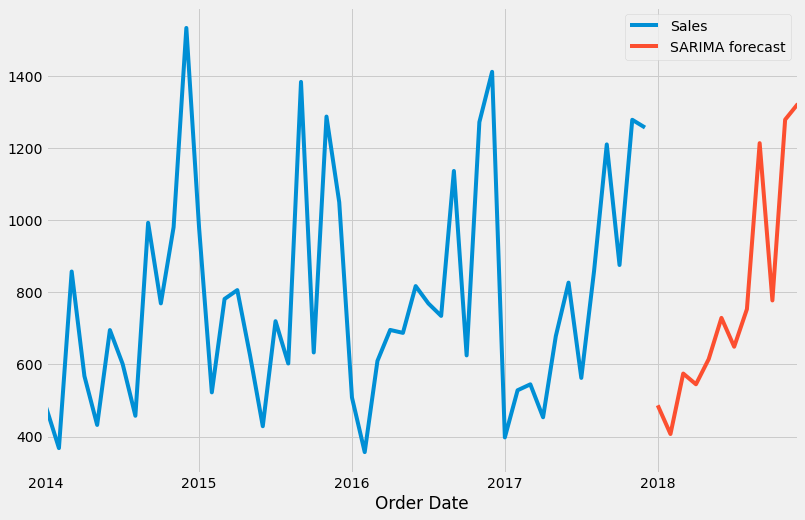

In [110]:
y_furniture.plot(legend=True,figsize=(12,8))
forecast_furniture.plot(legend=True)

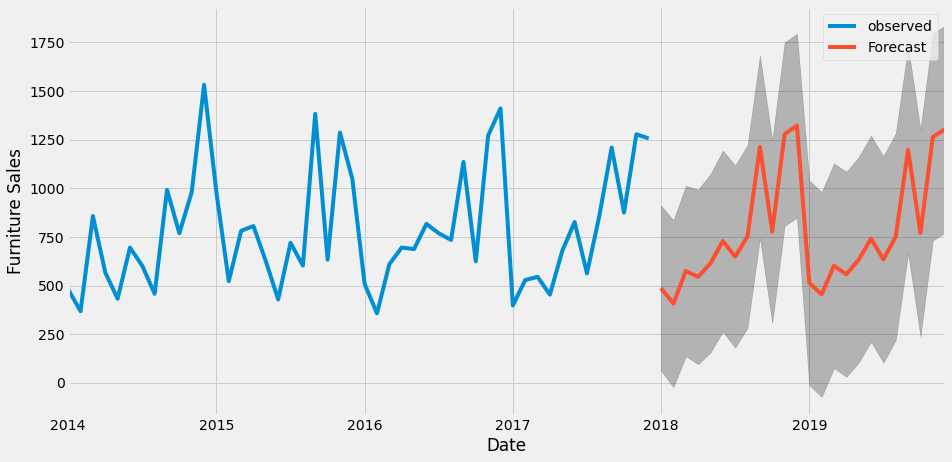

In [111]:
pred_furniture = result_furniture_final.get_forecast(steps=24)
pred_ci_furniture = pred_furniture.conf_int()
ax = y_furniture.plot(label='observed',figsize=(14,7))
pred_furniture.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci_furniture.index,
               pred_ci_furniture.iloc[:,0],
               pred_ci_furniture.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Technology

In [112]:
len(y_technology)

48

In [113]:
train_technology = y_technology.iloc[:36]
test_technology = y_technology.iloc[36:]

In [114]:
train_technology

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
2014-06-01     766.905909
2014-07-01     533.608933
2014-08-01     708.435385
2014-09-01    2035.838133
2014-10-01     596.900900
2014-11-01    1208.056320
2014-12-01    1160.732889
2015-01-01     925.070800
2015-02-01     431.121250
2015-03-01     574.662333
2015-04-01     697.559500
2015-05-01     831.642857
2015-06-01     429.024400
2015-07-01     691.397733
2015-08-01    1108.902286
2015-09-01     950.856400
2015-10-01     594.716111
2015-11-01    1037.982652
2015-12-01    1619.637636
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
Freq: MS, Name: Sales, dtype: float64

In [115]:
test_technology

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64

In [116]:
len(test_technology)

12

Find the best model

In [117]:
model_technology = auto_arima(y_technology,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=732.020, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=725.877, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=729.717, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=729.615, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=807.454, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=727.873, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=727.843, Time=0.02 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=729.843, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=727.740, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=727.697, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=729.641, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.163 seconds


In [118]:
model_technology.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                -360.939
Date:                Tue, 26 Jul 2022   AIC                            725.877
Time:                        16:05:54   BIC                            729.620
Sample:                             0   HQIC                           727.291
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    967.6149     77.667     12.458      0.000     815.390    1119.840
sigma2       1.99e+05   4.64e+04      4.292      0.000    1.08e+05     2.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 5.70
Prob(Q):                              0.70   Prob(JB):                         0.06
Heteroskedasticity (H):               0.69   Skew:                             0.84
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
model_technology

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [120]:
#That means our data have White noise .
#Time series that show no autocorrelation are called white noise.
#If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.
#https://machinelearningmastery.com/white-noise-time-series-python/
#https://machinelearningmastery.com/white-noise-time-series-python/#:~:text=White%20noise%20is%20an%20important,made%20to%20the%20predictive%20model.

In [121]:
model_technology = auto_arima(y_technology,allowmean=False,allowdrift=False,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=732.020, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=725.877, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=729.717, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=729.615, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=807.454, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=727.873, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=727.843, Time=0.01 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=729.843, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=727.740, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=727.697, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=729.641, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.136 seconds


Train the model

In [122]:
model_technology = SARIMAX(train_technology,order=(0, 0, 0),seasonal_order=(0, 0, 0, 12),enforce_invertibility=False)

In [123]:
result_technology = model_technology.fit()

Run model diagnostics to investigate any unusual behaviour

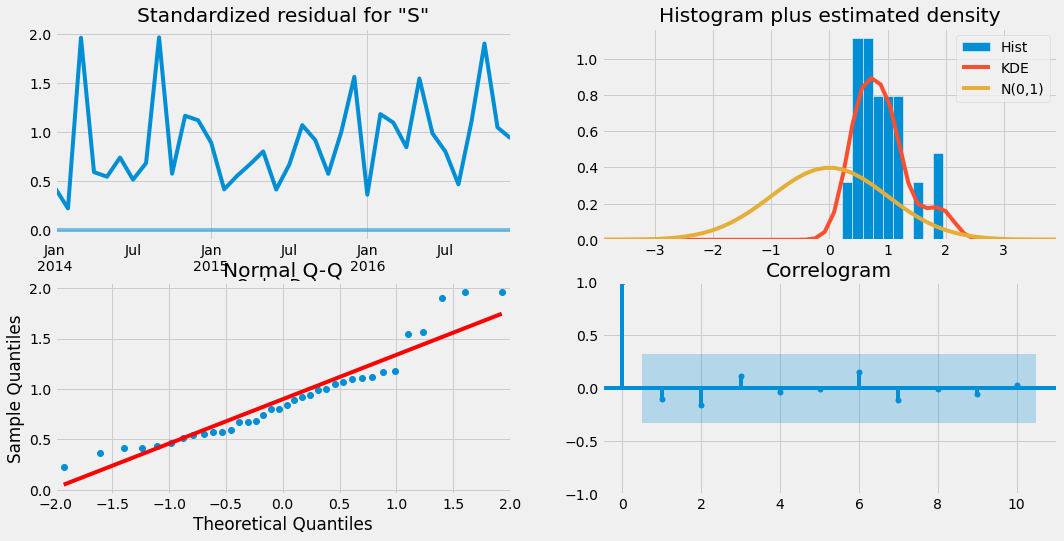

In [124]:
result_technology.plot_diagnostics(figsize=(16,8))
plt.show()

Now predict the future values

In [125]:
start = len(train_technology)
end = len(train_technology) + len(test_technology) - 1

In [126]:
prediction_technology = result_technology.predict(start,end).rename('SARIMA model')

In [127]:
prediction_technology

2017-01-01    0.0
2017-02-01    0.0
2017-03-01    0.0
2017-04-01    0.0
2017-05-01    0.0
2017-06-01    0.0
2017-07-01    0.0
2017-08-01    0.0
2017-09-01    0.0
2017-10-01    0.0
2017-11-01    0.0
2017-12-01    0.0
Freq: MS, Name: SARIMA model, dtype: float64

In [128]:
model_technology_final = SARIMAX(y_technology,order=(0, 0, 0),seasonal_order=(0, 0, 0, 12),enforce_invertibility=False)

In [129]:
result_technology_final = model_technology_final.fit()

In [130]:
forecast_technology = result_technology_final.predict(len(y_technology),len(y_technology)+11,typ='levels').rename('SARIMA forecast')

<AxesSubplot:xlabel='Order Date'>

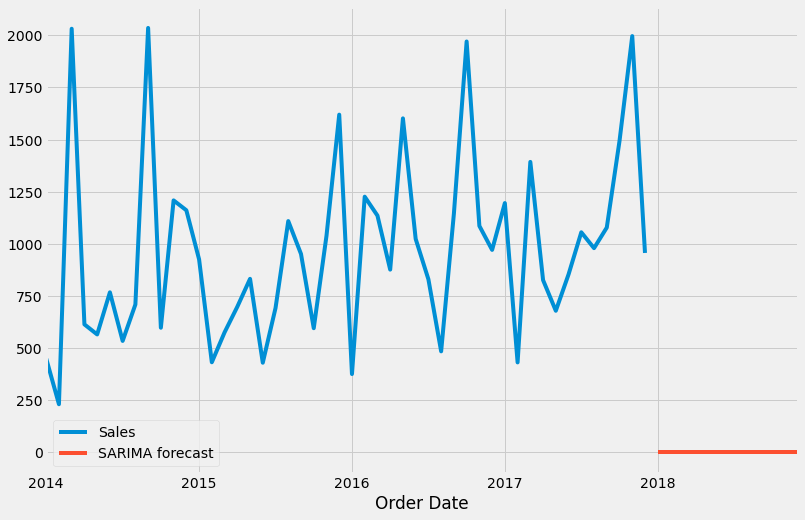

In [131]:
y_technology.plot(legend=True,figsize=(12,8))
forecast_technology.plot(legend=True)